In [1]:
# import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("E:\Technology\python\Datasets\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [8]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print('details of valid transaction')
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

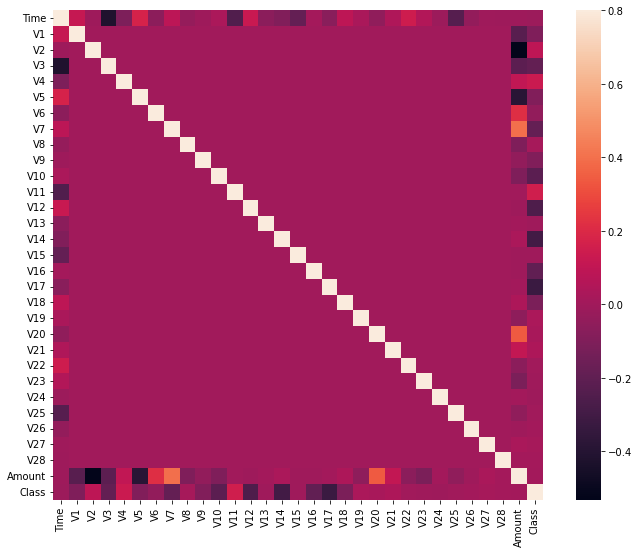

In [10]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [11]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


### Splitting the data

In [12]:
from sklearn.model_selection import train_test_split
xTrain_imb, xTest_imb, yTrain_imb, yTest_imb = train_test_split(X, Y, test_size = 0.2, random_state = 42)


### Defining Models

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=10000)

from keras.models import Sequential
from keras.layers import Dense, Dropout

nn = Sequential([Dense(input_dim=30, units=16, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')])

#### Method for Model building, Predictions, Classification report and Confusion matrix

In [14]:
def model_build(model,xtrain,ytrain,xtest,ytest):
    
    start = time.time()
    print("Start time: ",time.time())
    
    if model == nn:
        
        model.summary()

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(xtrain, ytrain, batch_size=15, epochs=15)
        
        ypred1 = model.predict(xtest)
        
        print("Model Score on testing data :",model.evaluate(xtest, ytest))
        print("\n")
        
        ypred = []
        
        for y in ypred1:
            
            if y > 0.5:
                ypred.append(1)
            else:
                ypred.append(0)
    
    else:
        
        model.fit(xtrain,ytrain)
        
        ypred = model.predict(xtest)
        
        print("Model Score on testing data :",model.score(xtest,ytest))
        print("\n")
    
    print("Classification report on Testing and Predicted data :")
    print("\n")
    print(classification_report(ytest,ypred))
    print()
    
    LABELS = ['Normal', 'Fraud']
    conf_matrix = confusion_matrix(ytest, ypred)
    plt.figure(figsize =(12, 12))
    
    print("Confusion matrix of the model :")
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    
    end = time.time()
    print("End time: ", time.time())
    
    print("Total Time taken :", end-start)

### Prediction on Imbalanced dataset

#### i) Using Random Forest


Start time:  1693851574.4654398
Model Score on testing data : 0.9995611109160493


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix of the model :


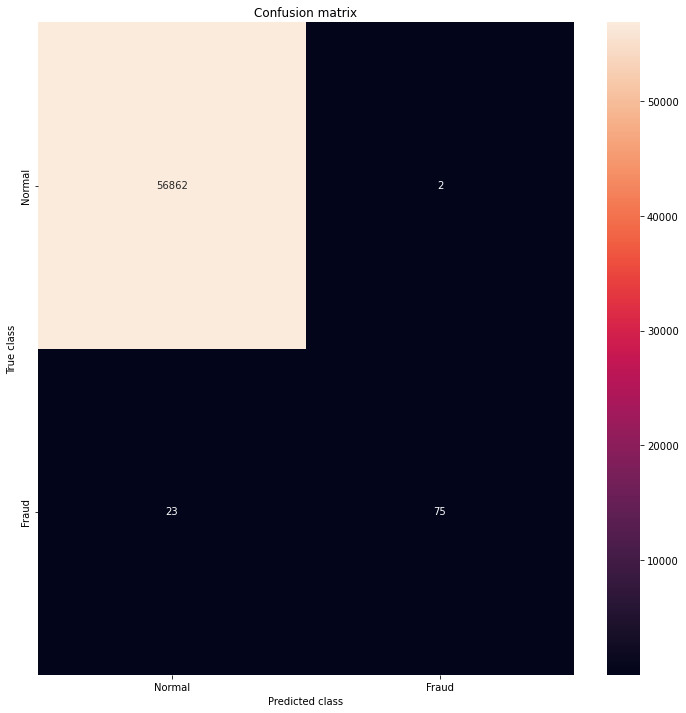

End time:  1693851785.9772105
Total Time taken : 211.51177072525024


In [15]:
model_build(rfc,xTrain_imb,yTrain_imb,xTest_imb,yTest_imb)

#### ii) Using Decision Tree

Start time:  1693851798.7599943
Model Score on testing data : 0.999420666409185


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix of the model :


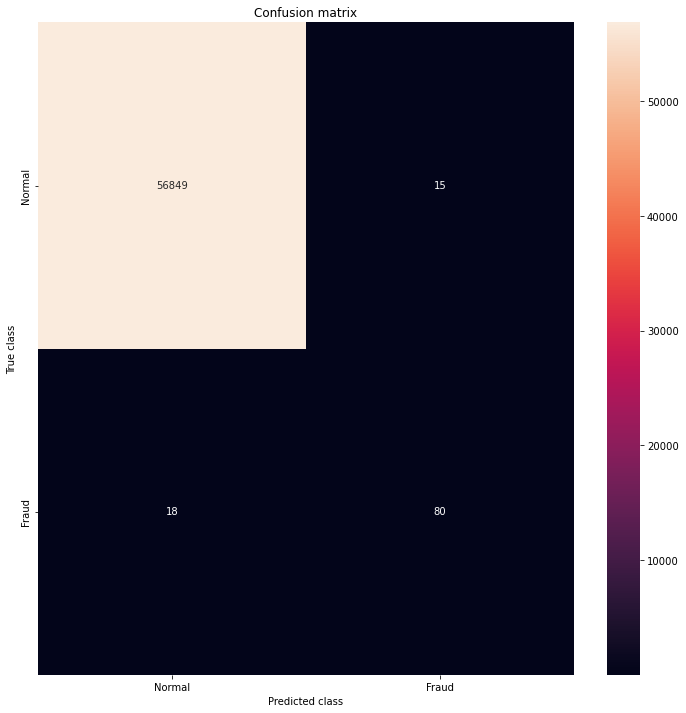

End time:  1693851803.3082523
Total Time taken : 4.548258066177368


In [16]:
model_build(dtc,xTrain_imb,yTrain_imb,xTest_imb,yTest_imb)

#### iii) Using Logistic Regression

Start time:  1693851809.2399247
Model Score on testing data : 0.9989291106351603


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.50      0.62        98

    accuracy                           1.00     56962
   macro avg       0.90      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix of the model :


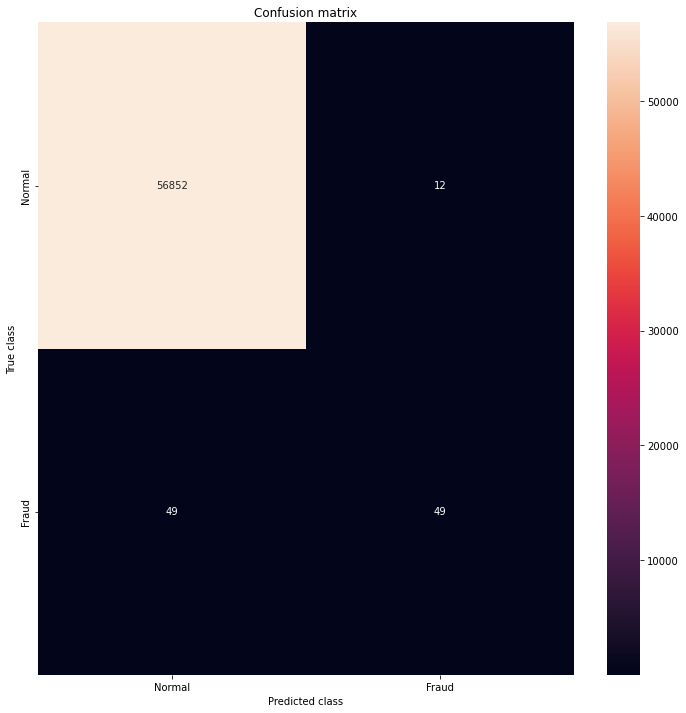

End time:  1693851834.3075247
Total Time taken : 25.06760001182556


In [17]:
model_build(lg,xTrain_imb,yTrain_imb,xTest_imb,yTest_imb)

#### iv) Using Neural Network

Start time:  1693853544.1774964
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1933 (7.55

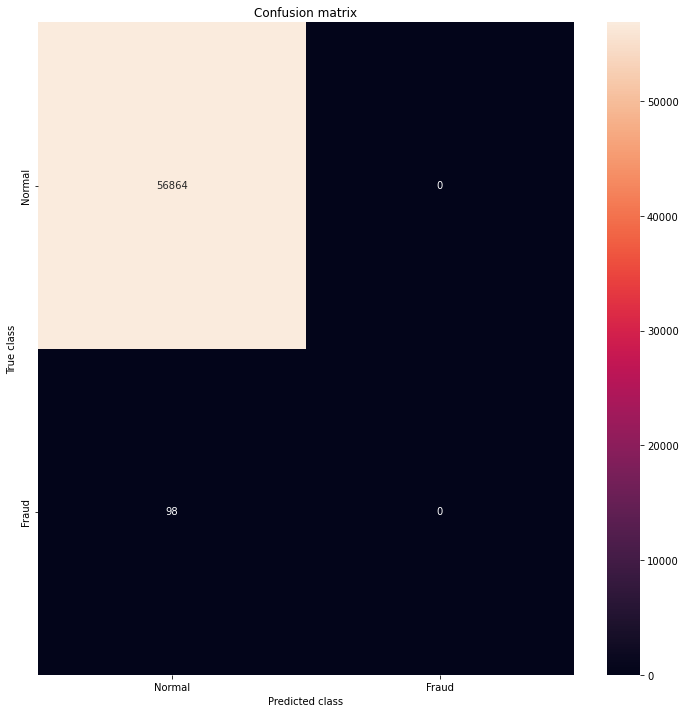

End time:  1693853931.7323735
Total Time taken : 387.5548770427704


In [26]:
model_build(nn,xTrain_imb,yTrain_imb,xTest_imb,yTest_imb)

## Prediction on balanced dataset

### 1. Using Random Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
xTrain_ros, yTrain_ros = ros.fit_resample(xTrain_imb, yTrain_imb)

#### i) Using Random Forest

Start time:  1693825721.352294
Model Score on testing data : 0.9995962220427653


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix of the model :


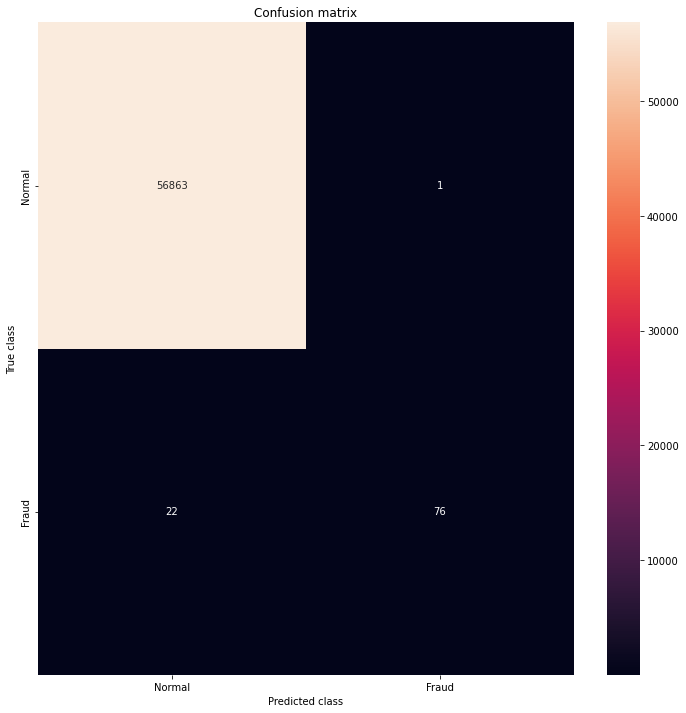

End time:  1693825966.2171283
Total Time taken : 244.86483430862427


In [21]:
model_build(rfc,xTrain_ros,yTrain_ros,xTest_imb,yTest_imb)

#### ii) Using Decision Tree

Start time:  1693825992.7060616
Model Score on testing data : 0.9995962220427653


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix of the model :


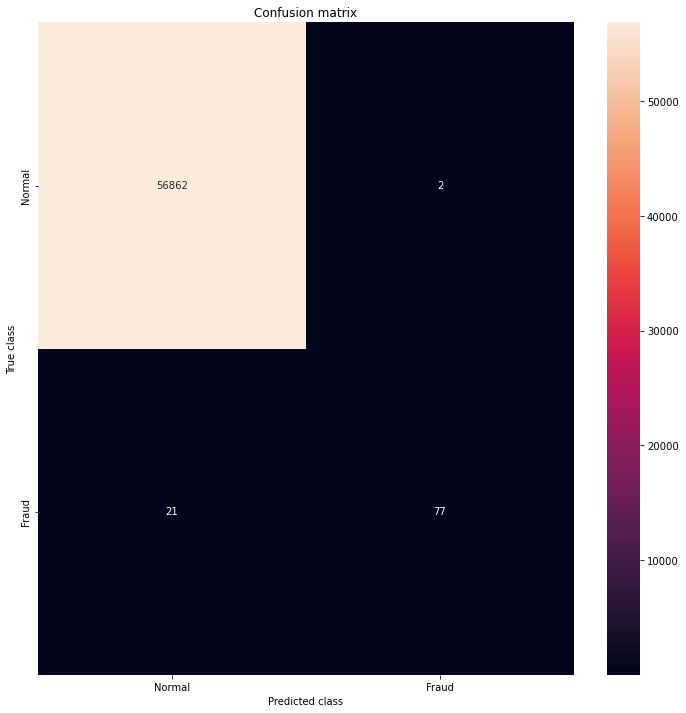

End time:  1693826209.0520096
Total Time taken : 216.34594798088074


In [22]:
model_build(rfc,xTrain_ros,yTrain_ros,xTest_imb,yTest_imb)

#### iii) Using Logistic Regression

Start time:  1693826296.9618971
Model Score on testing data : 0.9677153189845862


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


Confusion matrix of the model :


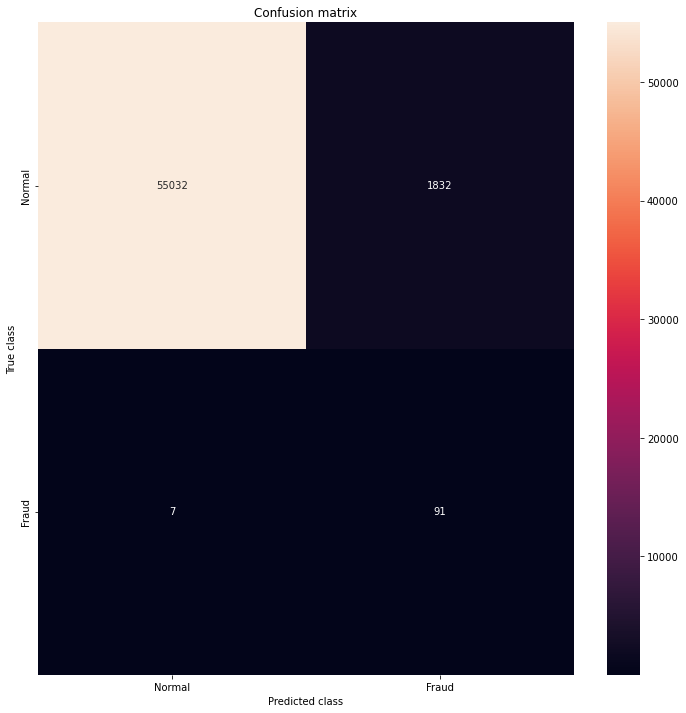

End time:  1693826306.001363
Total Time taken : 9.03946590423584


In [23]:
model_build(lg,xTrain_ros,yTrain_ros,xTest_imb,yTest_imb)

#### iv) Using Neural Network

Start time:  1693854259.3297918
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1933 (7.55

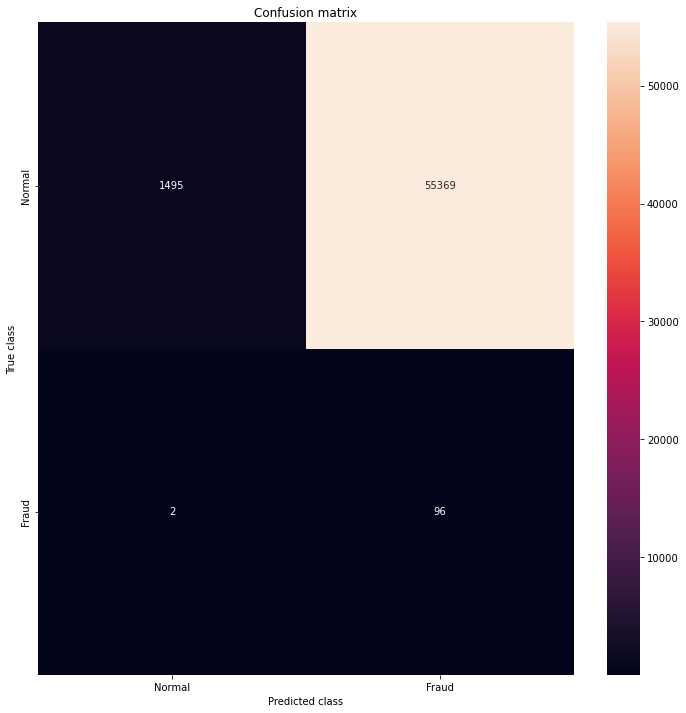

End time:  1693855024.7115893
Total Time taken : 765.3817975521088


In [29]:
model_build(nn,xTrain_ros,yTrain_ros,xTest_imb,yTest_imb)

### 2. Using SMOTE(Synthetic Minority Oversampling Technique)

In [18]:
from imblearn.over_sampling import SMOTE

smote  = SMOTE(random_state=42)
xTrain_sm, yTrain_sm = smote.fit_resample(xTrain_imb,yTrain_imb)

#### i) Using Random Forest

Start time:  1693851853.7599406
Model Score on testing data : 0.9995084442259752


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix of the model :


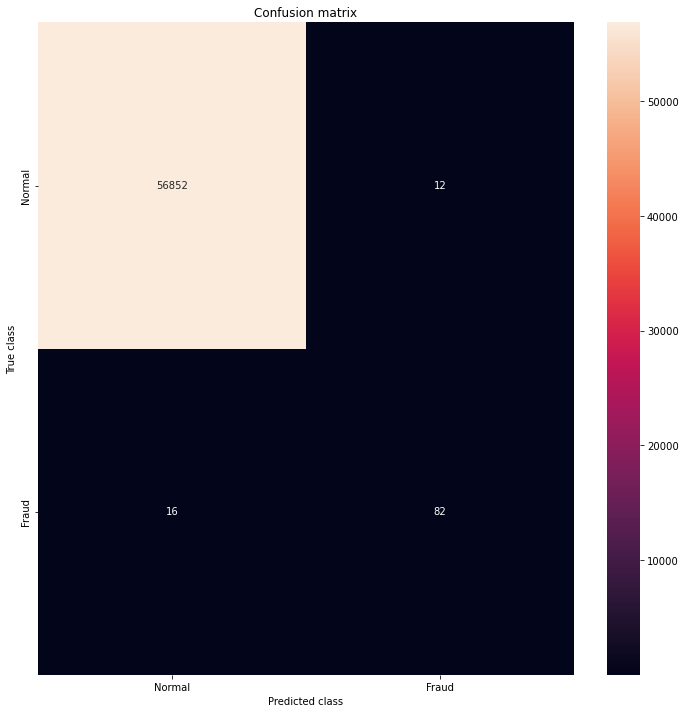

End time:  1693852262.5815098
Total Time taken : 408.82156920433044


In [19]:
model_build(rfc,xTrain_sm,yTrain_sm,xTest_imb,yTest_imb)

#### ii) Using Decision Tree

Start time:  1693852847.4897065
Model Score on testing data : 0.9860257715670095


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.85      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.58     56962
weighted avg       1.00      0.99      0.99     56962


Confusion matrix of the model :


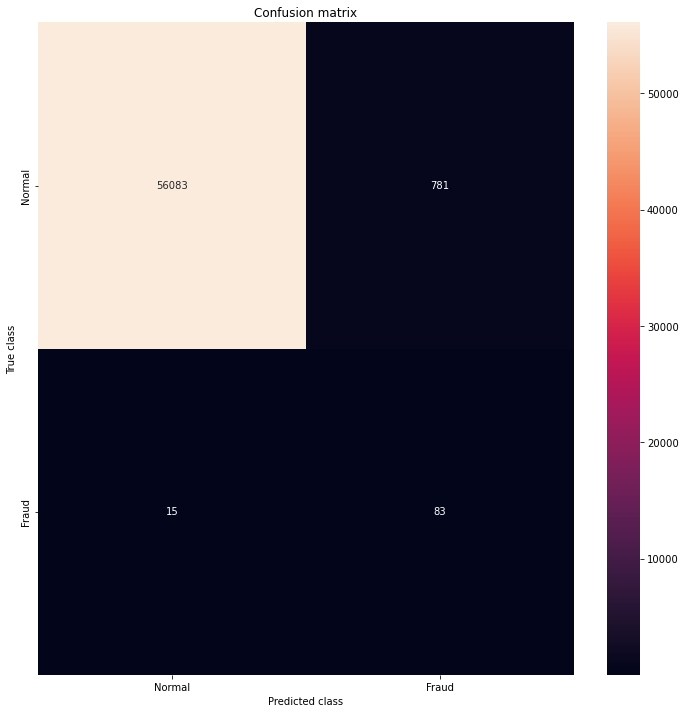

End time:  1693852856.0406585
Total Time taken : 8.550951957702637


In [20]:
model_build(dtc,xTrain_sm,yTrain_sm,xTest_imb,yTest_imb)

#### iii) Using Logistic Regression

Start time:  1693852869.1915293
Model Score on testing data : 0.9840946595976265


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.89      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.58     56962
weighted avg       1.00      0.98      0.99     56962


Confusion matrix of the model :


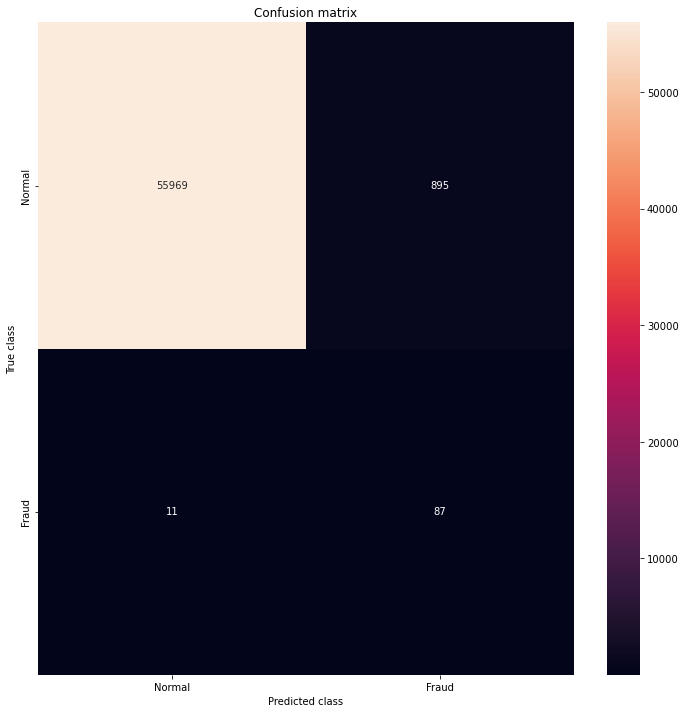

End time:  1693852877.7684786
Total Time taken : 8.57694935798645


In [21]:
model_build(lg,xTrain_sm,yTrain_sm,xTest_imb,yTest_imb)

#### iv) Using Neural Network

Start time:  1693855398.4979842
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1933 (7.55

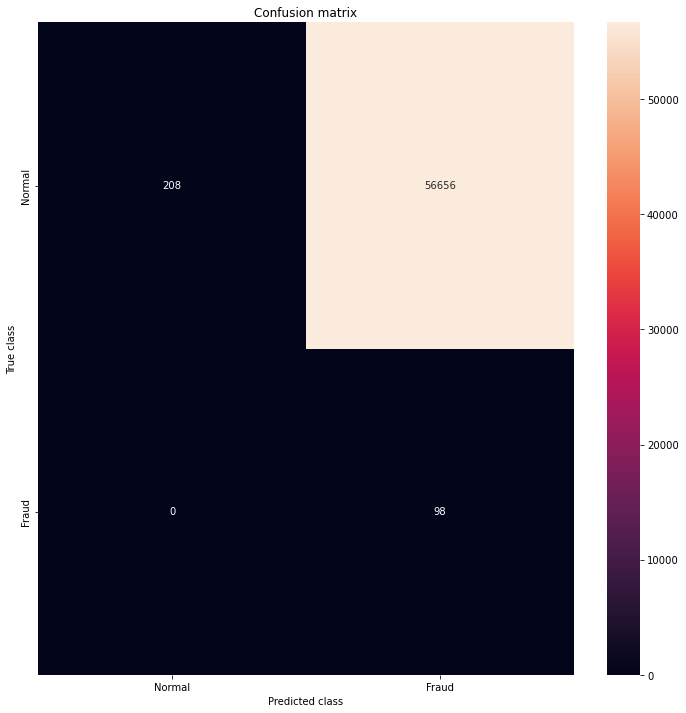

End time:  1693856159.504382
Total Time taken : 761.0063977241516


In [31]:
model_build(nn,xTrain_sm,yTrain_sm,xTest_imb,yTest_imb)

### 3. Using ADASYN (Adaptive Synthetic)

In [22]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)

xTrain_ada, yTrain_ada = adasyn.fit_resample(xTrain_imb, yTrain_imb)

#### i) Using Random Forest

Start time:  1693852972.9301026
Model Score on testing data : 0.9995435553526912


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix of the model :


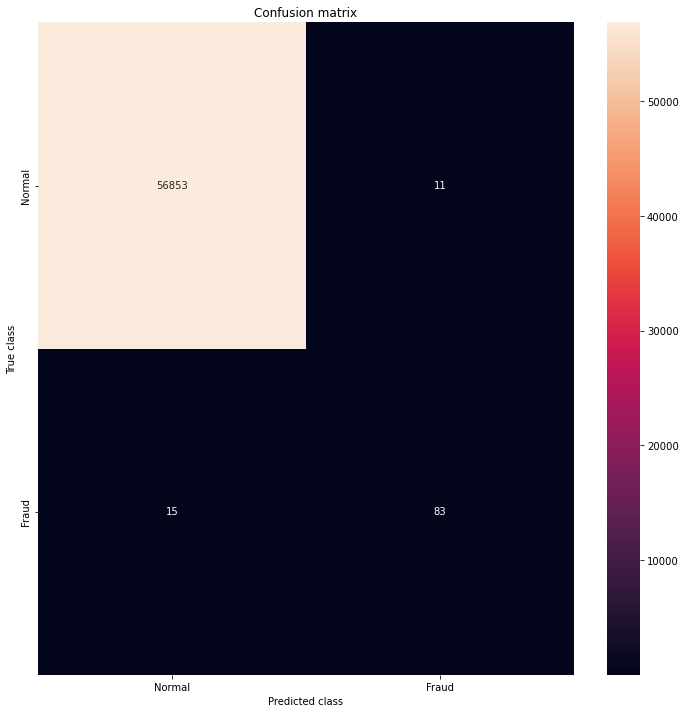

End time:  1693853352.0607448
Total Time taken : 379.13064217567444


In [25]:
model_build(rfc,xTrain_ada,yTrain_ada,xTest_imb,yTest_imb)

#### ii) Using Descision Tree

Start time:  1693852892.5518475
Model Score on testing data : 0.9877813279028124


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.85      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.59     56962
weighted avg       1.00      0.99      0.99     56962


Confusion matrix of the model :


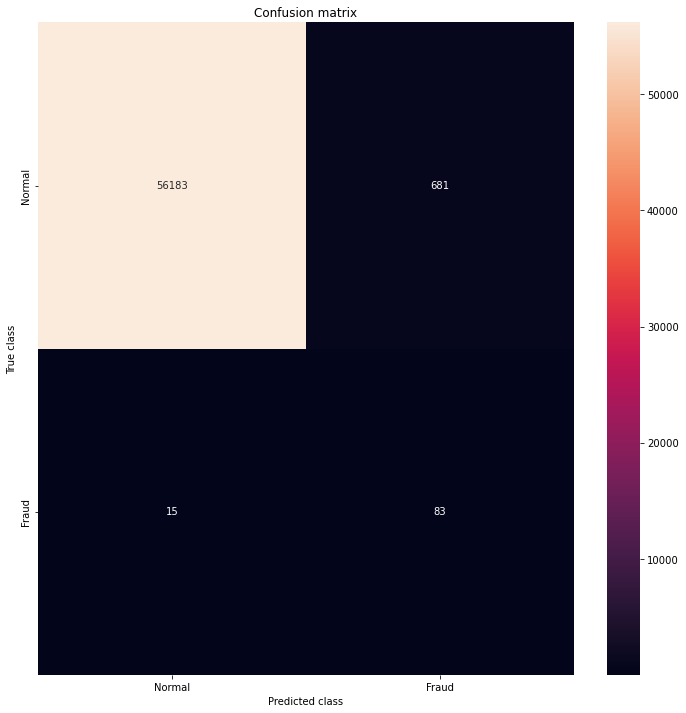

End time:  1693852901.130674
Total Time taken : 8.578826427459717


In [23]:
model_build(dtc,xTrain_ada,yTrain_ada,xTest_imb,yTest_imb)

#### iii) Using Logistic Regression

Start time:  1693852906.6566627
Model Score on testing data : 0.9798637688283417


Classification report on Testing and Predicted data :


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962


Confusion matrix of the model :


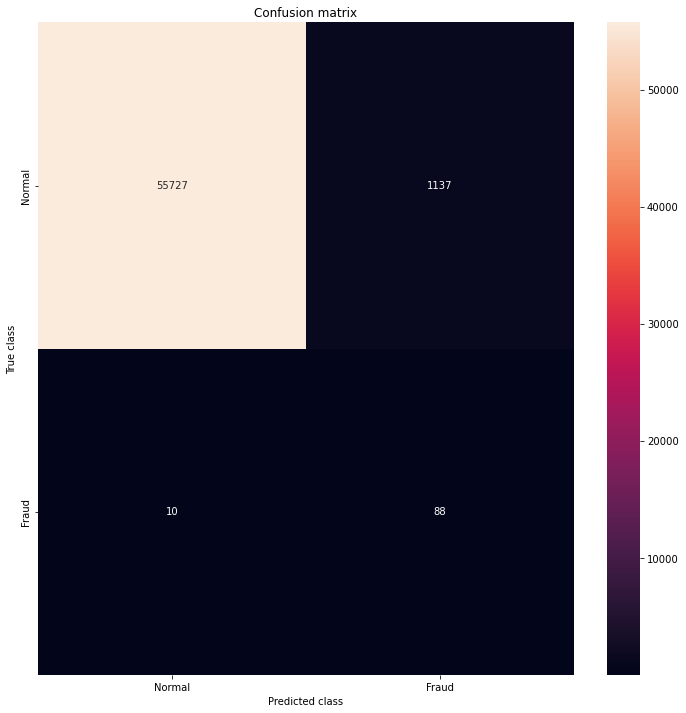

End time:  1693852911.901327
Total Time taken : 5.244664192199707


In [24]:
model_build(lg,xTrain_ada,yTrain_ada,xTest_imb,yTest_imb)

#### iv) Using Neural Network

Start time:  1693855024.7272143
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1933 (7.55

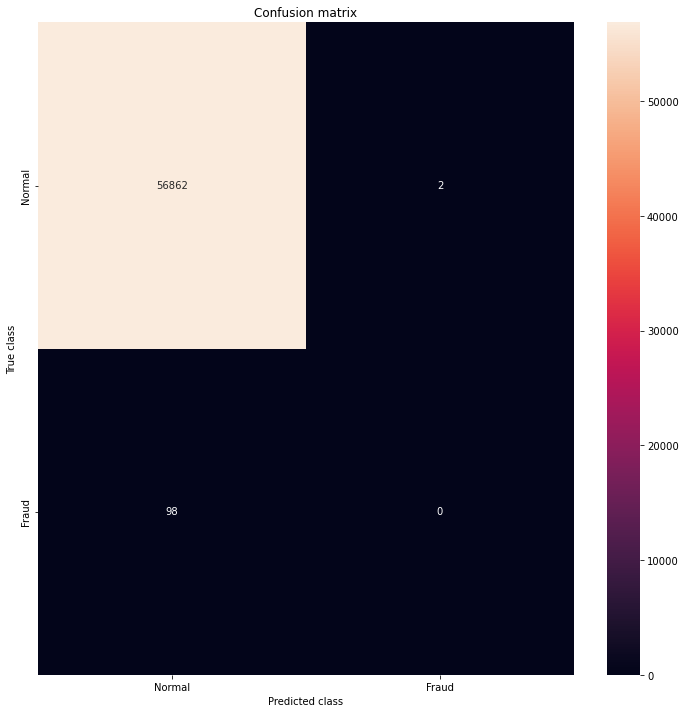

End time:  1693855398.482399
Total Time taken : 373.75518465042114


In [30]:
model_build(nn,xTrain_imb,yTrain_imb,xTest_imb,yTest_imb)

### Final Result : Amongst all the Models which were trained and tested, Random Forest outshone all other algorithms, delivering a F1-score of 0.87 through the implementation of Oversampling.